In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1981.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1981,17751,56,42,3528
1,1981,17482,175,16,3550
2,1981,18046,142,33,3527
3,1981,17180,172,36,3519
4,1981,17553,129,21,3510
...,...,...,...,...,...
1851,1981,17068,271,21,3508
1852,1981,17324,296,21,3536
1853,1981,17496,310,26,3559
1854,1981,18010,340,42,3536


In [3]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1856, 5)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1856 non-null   int64
 1   Maximum length (m))  1856 non-null   int64
 2   Recession(m),        1856 non-null   int64
 3   Rate/yr(m)           1856 non-null   int64
 4   Snout altitude (m)   1856 non-null   int64
dtypes: int64(5)
memory usage: 72.6 KB


In [5]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [6]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1856


In [7]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [8]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [9]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1981,17751,56,42,3528
1,1981,17482,175,16,3550
2,1981,18046,142,33,3527
3,1981,17180,172,36,3519
4,1981,17553,129,21,3510


In [10]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0064,0.0276,-0.0073
"Recession(m),",NaN,-0.0064,1.0000,0.0198,0.0307
Rate/yr(m),NaN,0.0276,0.0198,1.0000,-0.0160
Snout altitude (m),NaN,-0.0073,0.0307,-0.0160,1.0000


In [11]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0276
Recession(m),         -0.0064
Snout altitude (m)    -0.0073
Year                      NaN
Name: Maximum length (m)), dtype: float64

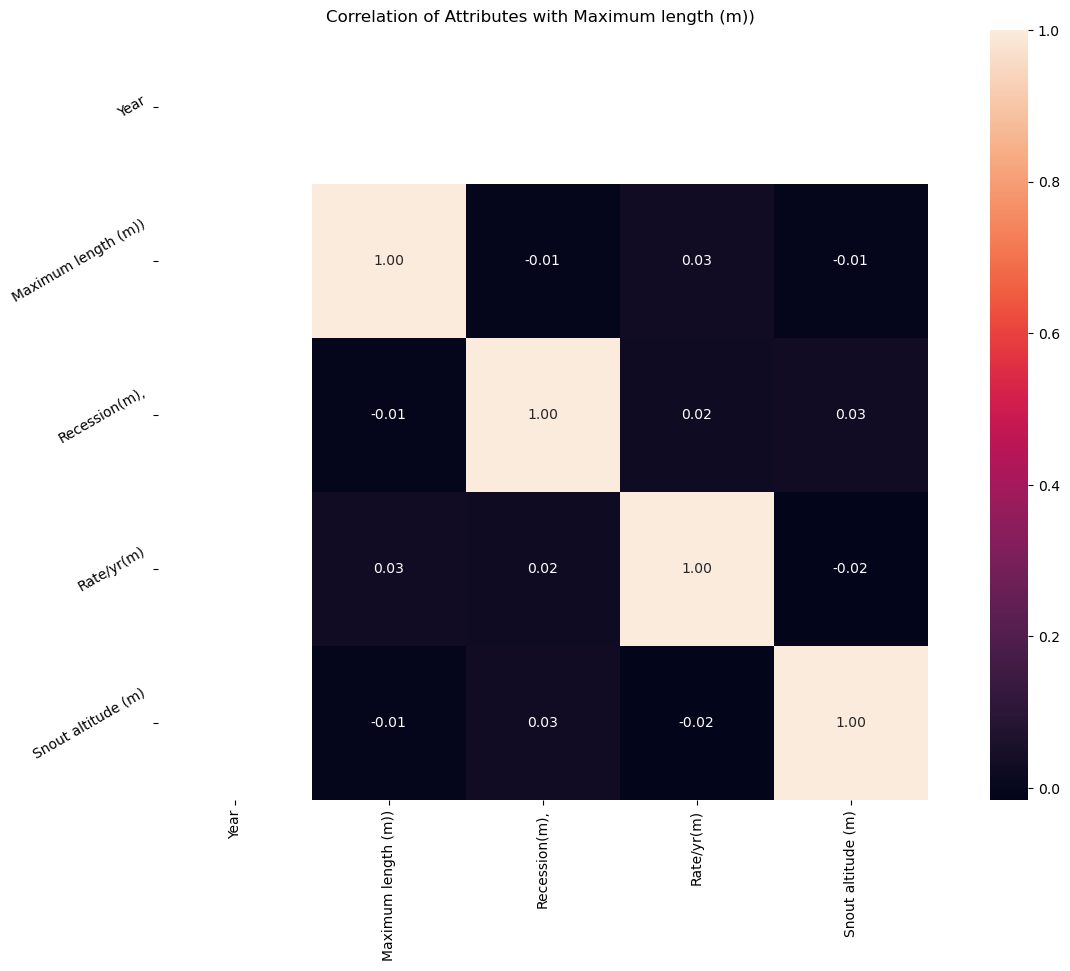

In [12]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [13]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [14]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,856.0000","1,856.0000","1,856.0000","1,856.0000","1,856.0000"
mean,"1,981.0000","17,555.0151",225.8367,27.3518,"3,530.7845"
std,0.0000,299.0682,129.3390,8.6830,20.4058
min,"1,981.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,981.0000","17,294.0000",112.7500,20.0000,"3,513.0000"
50%,"1,981.0000","17,553.0000",229.0000,27.0000,"3,530.0000"
75%,"1,981.0000","17,822.0000",339.2500,35.0000,"3,548.0000"
max,"1,981.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [15]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1981   1.0000
Name: count, dtype: float64

Recession(m),
202   0.0054
257   0.0054
348   0.0048
409   0.0048
209   0.0048
       ...  
282   0.0005
327   0.0005
154   0.0005
355   0.0005
312   0.0005
Name: count, Length: 437, dtype: float64

Rate/yr(m)
18   0.0409
20   0.0388
16   0.0383
28   0.0372
24   0.0366
40   0.0366
22   0.0361
36   0.0361
27   0.0356
42   0.0350
21   0.0350
41   0.0350
37   0.0345
25   0.0339
17   0.0334
19   0.0334
15   0.0329
32   0.0323
13   0.0318
33   0.0318
29   0.0318
35   0.0318
39   0.0307
30   0.0307
26   0.0302
23   0.0296
38   0.0286
14   0.0280
31   0.0275
34   0.0259
Name: count, dtype: float64

Snout altitude (m)
3518   0.0199
3531   0.0194
3510   0.0194
3513   0.0189
3561   0.0189
        ...  
3565   0.0092
3560   0.0092
3520   0.0086
3549   0.0054
3496   0.0005
Name: count, Length: 72, dtype: float64



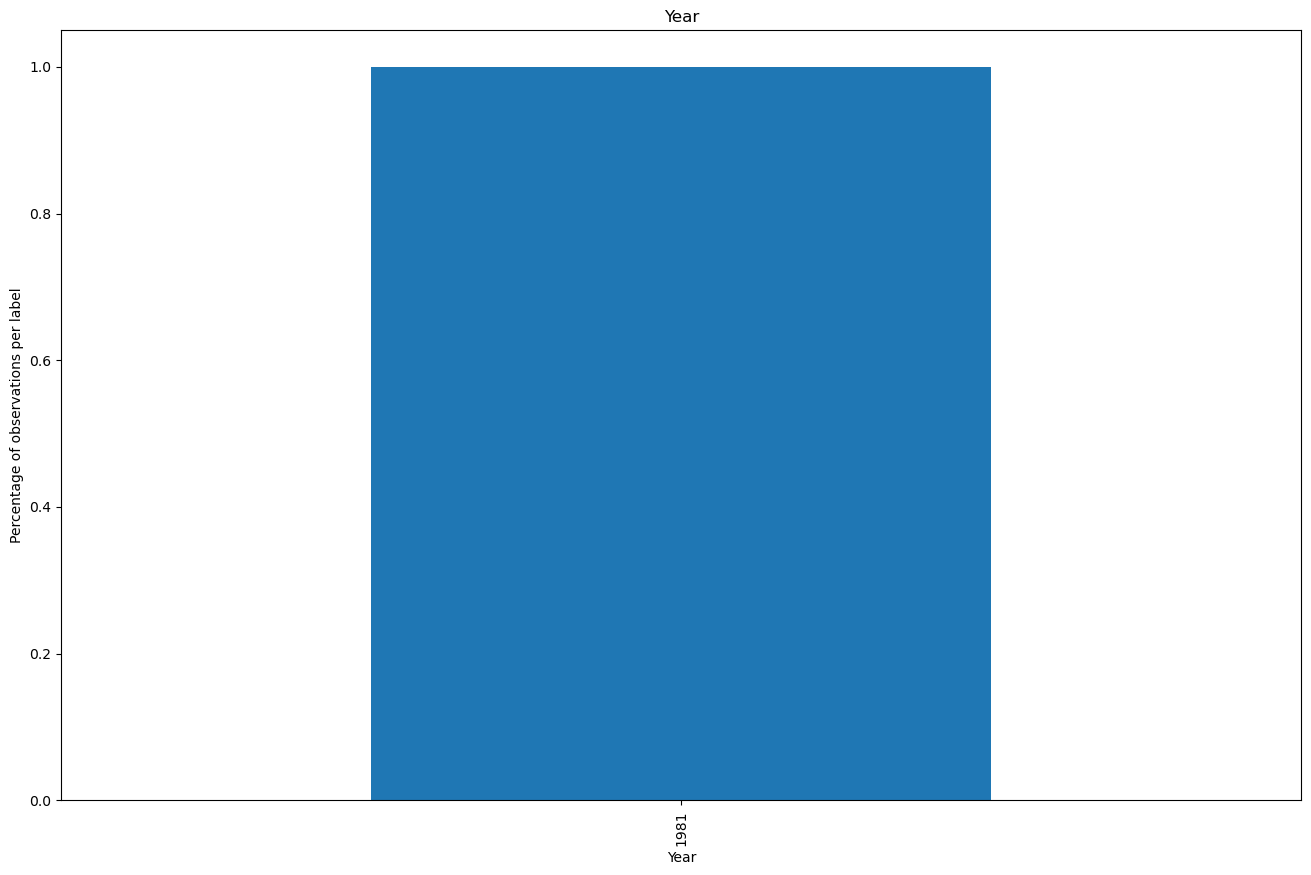

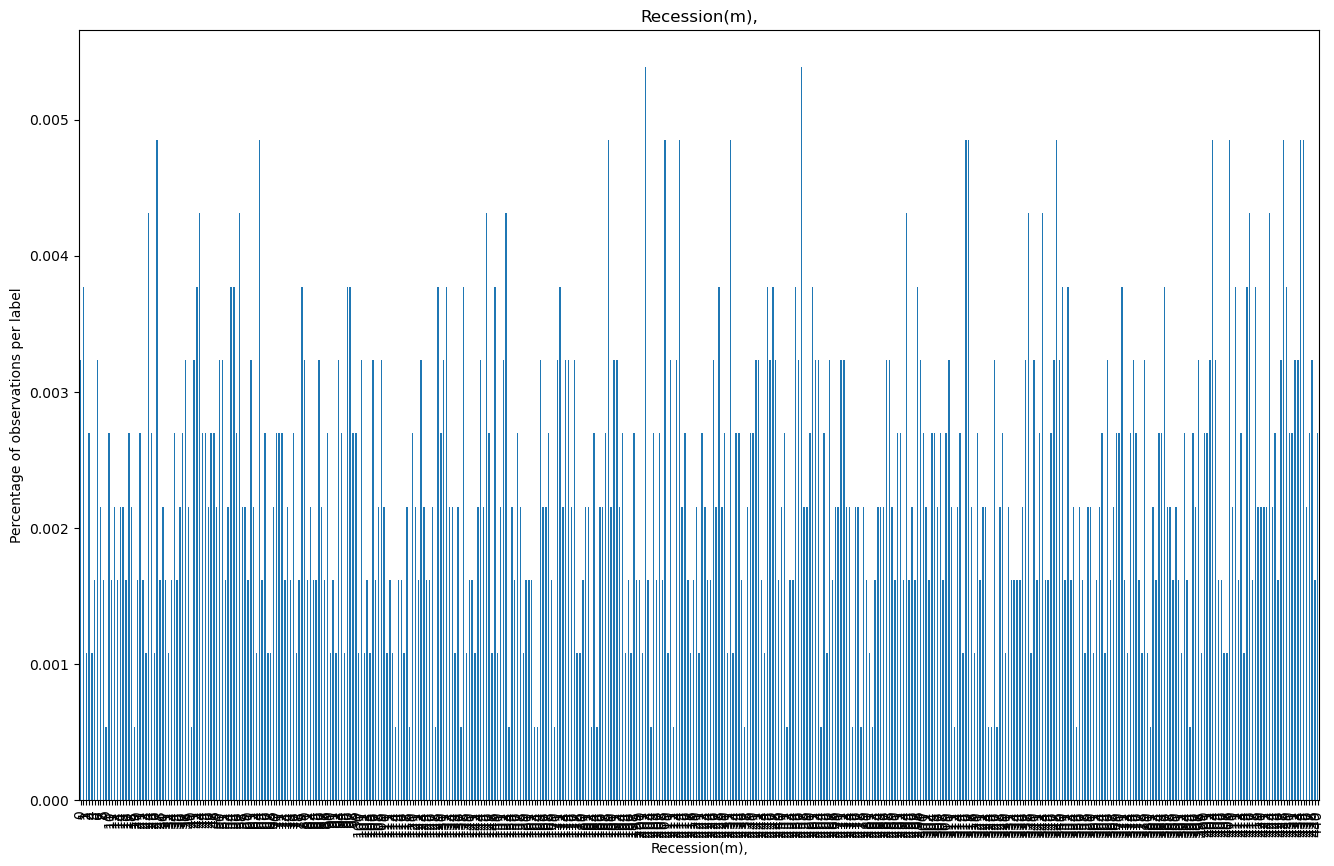

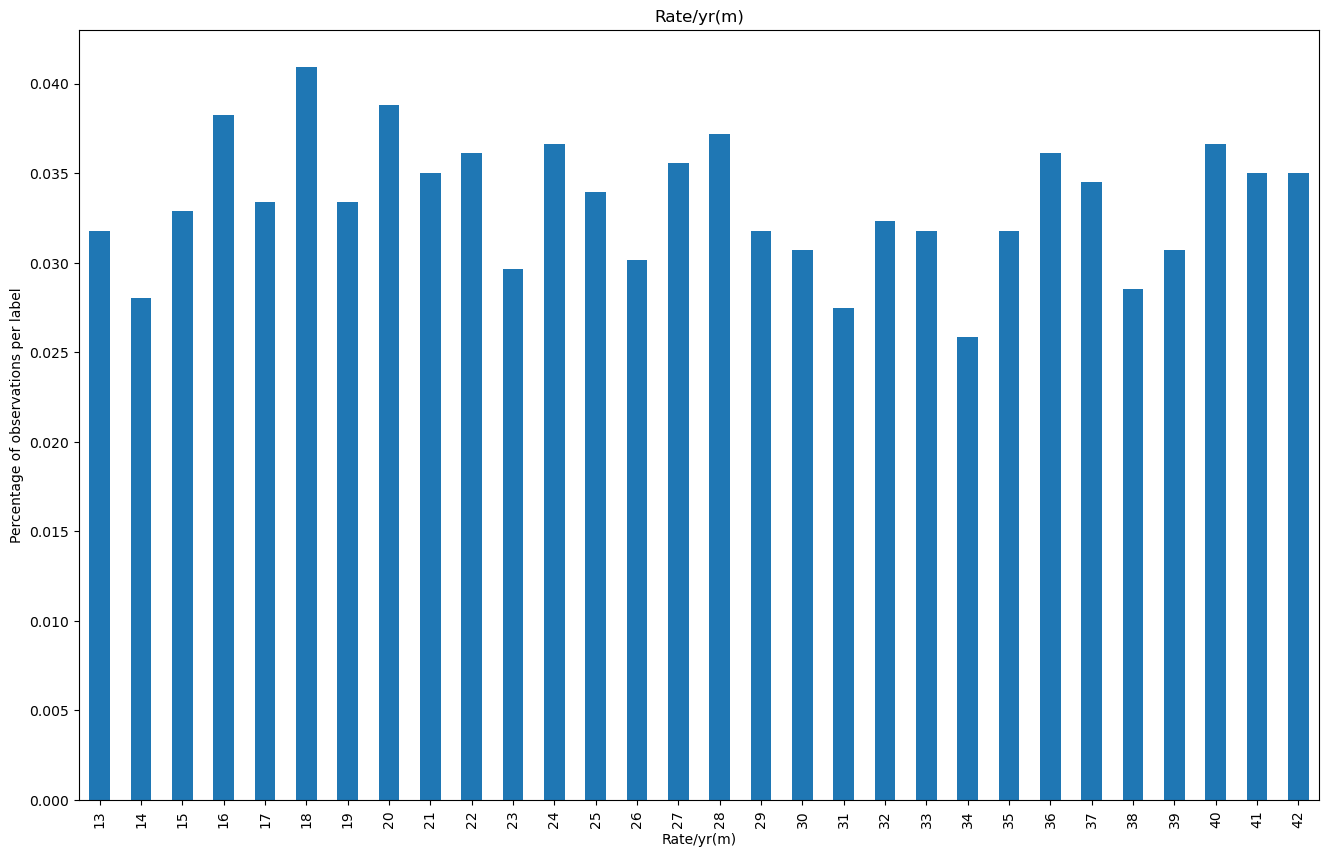

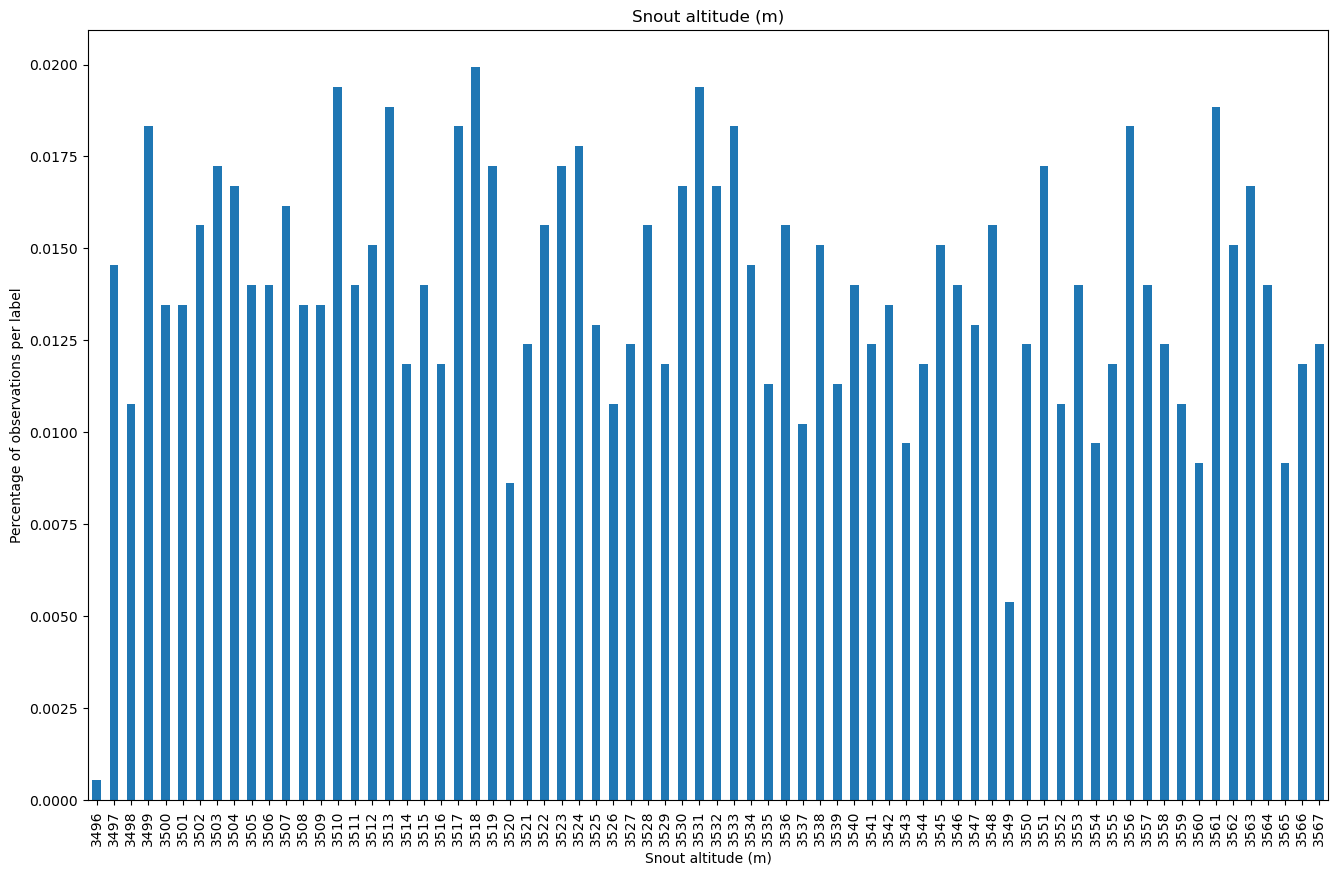

In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()